# Problem 7
In this problem we apply GMM classification on a set of two football teams: ManchesterUnited and Chelsea.

In [2]:
import pandas as pd
from PIL import Image, ImageColor
import os
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt

data_path = './HW3_Q7_Dataset/Q6_Dataset/Images/'

# Importing Data
Here we read image files with PIL Image.open function and convert each image to numpy array. Then we optain the mean Red and mean Blue color of the the pixels of each of these arrays. We will use mean Red and mean Blue as the two features of each sample image.

Also we find the real class of each image based on the first letter of the filename of that image. If it is 'c' the class is 1 and 0 otherwise.

In [3]:
samples = []
file_names = os.listdir(data_path)

for f in file_names:
    img = Image.open(os.path.join(data_path, f))
    img = np.array(img)    
    samples.append([np.mean(img[:, :, 0]), np.mean(img[:, :, 2]), int(f[0] == 'c')])
                   
data = pd.DataFrame(samples, columns=['red', 'blue', 'class'])                   

We see that 64 of the samples are of class 1(Chelsea)

In [4]:
data["class"].sum()

64

Here are the plot utilities for plotting the countour and the data points:

In [5]:
from matplotlib.patches import Ellipse

def plot_data(ax, X, y_pred, zorder):
    ax.scatter(X['red'], X['blue'], c=y_pred, zorder=2);
    ax.set_title('Distribution of mean R,B of images')
    ax.set_xlabel('red')
    ax.set_ylabel('blue') ##Chelsea

def plot_contour(ax, g_params):
    for xy, covariance, w in g_params:
        
        U, s, Vt = np.linalg.svd(covariance)        
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))    
        width, height = 2 * np.sqrt(s) 
        
        for nsig in range(1, 4):
            ax.add_patch(Ellipse(xy, nsig * width, nsig * height,
                                 angle, alpha= 0.1))
        
def plot_results(X, y_pred, g_params):
    
    fig, ax = plt.subplots(figsize=(10,8))
    ax.axis('equal')

    plot_data(ax, X, y_pred, zorder=2)
    plot_contour(ax, g_params)

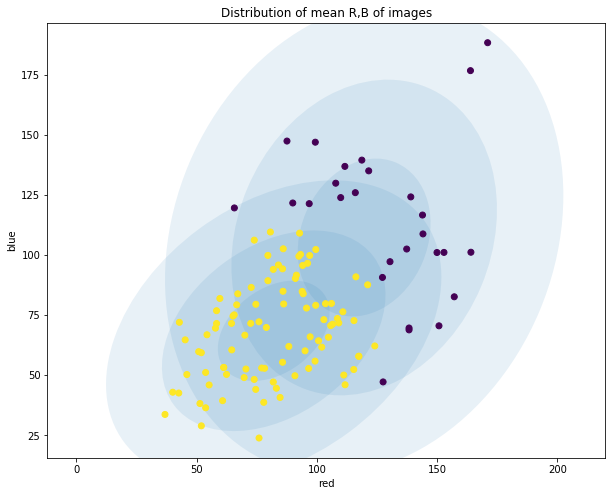

In [6]:
X = data[['red', 'blue']]
y = data['class']
gmm = GMM(n_components=2).fit(X)
y_pred = gmm.predict(X)
g_params = zip(gmm.means_, gmm.covariances_, gmm.weights_)
plot_results(X, y_pred, g_params)

Parameters for 2-component model:

In [7]:
print('means:')
print(gmm.means_, '\n')
print('covariances:')
print(gmm.covariances_,'\n')
print('weights:')
print(gmm.weights_)

means:
[[119.66810943 107.22716811]
 [ 82.04401806  68.43690406]] 

covariances:
[[[ 762.19658933  160.7290778 ]
  [ 160.7290778  1076.79819922]]

 [[ 540.25332873  173.29257413]
  [ 173.29257413  434.85988085]]] 

weights:
[0.26407229 0.73592771]


Now we obtain a model for each number of components between 1 and 30:

In [8]:
num_components = 30
x = np.arange(1, num_components)
models = list(map(
    lambda x : GMM(x, covariance_type="full")
    .fit(X), x
    ))
bics = [m.bic(X) for m in models]
aics = [m.aic(X) for m in models]

### Plotting the AIC and BIC:

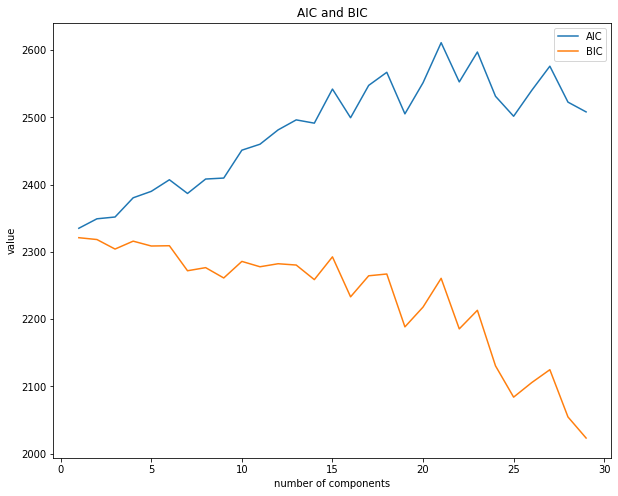

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(x, bics, label='AIC')
ax.plot(x, aics, label='BIC')
ax.set_title('AIC and BIC')
ax.set_xlabel('number of components')
ax.set_ylabel('value') ##Chelsea
ax.legend();

The smaller the AIC and BIC the better the result:
- As we can see here the AIC and BIC do not behave similarly so we can not choose the optimal number

## Parameters for each number of components:

In [10]:
for m in models:
    print('means:')
    print(m.means_, '\n')
    print('covariances:')
    print(m.covariances_,'\n')
    print('weights:')
    print(m.weights_)

means:
[[91.97949798 78.68033787]] 

covariances:
[[[873.96203675 453.60136165]
  [453.60136165 896.79556799]]] 

weights:
[1.]
means:
[[107.81062047  96.91068094]
 [ 78.52011031  63.18116813]] 

covariances:
[[[820.98201604 287.98754103]
  [287.98754103 970.20191129]]

 [[524.77254024 140.42520902]
  [140.42520902 311.60712937]]] 

weights:
[0.4595136 0.5404864]
means:
[[103.77470357  66.34522879]
 [ 72.144659    77.81690312]
 [103.24904881 123.92581788]] 

covariances:
[[[ 754.02005011  404.51089101]
  [ 404.51089101  420.17184342]]

 [[ 346.36801605  368.47373929]
  [ 368.47373929  522.96991215]]

 [[1034.29194143  800.99174029]
  [ 800.99174029  964.61994048]]] 

weights:
[0.48902797 0.37057826 0.14039377]
means:
[[106.4411221   64.06845818]
 [123.27477295 110.92651389]
 [ 64.22874628  57.96278421]
 [ 89.16653592  95.1033375 ]] 

covariances:
[[[171.79442497  15.24338397]
  [ 15.24338397 129.4349202 ]]

 [[696.53803555  86.39096723]
  [ 86.39096723 952.43773381]]

 [[182.44404577  